<a href="https://colab.research.google.com/github/rumaan-zs/StudentScorePredictionML/blob/main/StudentScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Score Prediction Model
## Perdiction Model to predict the Scores based on the number study hours.
### Predicting the score for a student who has a study time of 9.25 hours per day.

Import the Libraries required.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Reading the data from a remote link and printing a sample of the data.
The data is in form of a csv file.

In [96]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting the graph for the model with title and the labels for the graph to further examine the data.

Text(0.5, 1.0, 'Hours vs Scores')

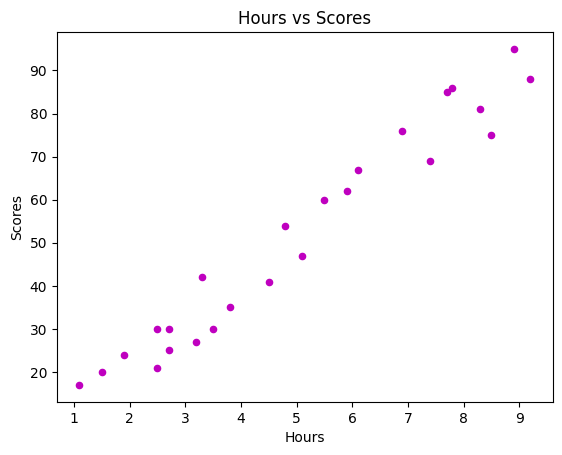

In [97]:
df.plot(kind='scatter', x='Hours', y='Scores', marker='o', color='m')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')

On examining the graph we see that the data is pretty much linear so we will proceed with a simple linear regression model.

Dividing the data into the training and the expected result.
Here, we expect the scores to be the output when we give the Hours as an input .
Since this is an extremely simple dataset we only have two columns.
The Hours is Put into X that is the input and the Scores into y that is the output.

In [98]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Next we are goin to split the data into test and train as we have to check the accuracy of the model that we train. Let us take a split of 80% Training and 20% Testing data.
The data is shuffled using shuffle as True.
Test size .2 shows that 20% of the data used is kept for testing.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=42 ,test_size=0.2, shuffle=True)
print("Data Split Successful")

Data Split Successful


For the given data, we will use simple Linear Regression. We first define a variable with thw model. Then we fit the training data to the model, i.e. basically teaching the regressor about the data.

In [100]:
model= LinearRegression()
model.fit(X_train,y_train)

print("Linear Regressor Training Complete")

Linear Regressor Training Complete


Plotting the Graph with the regressor line once the model has been trained for the Training values.

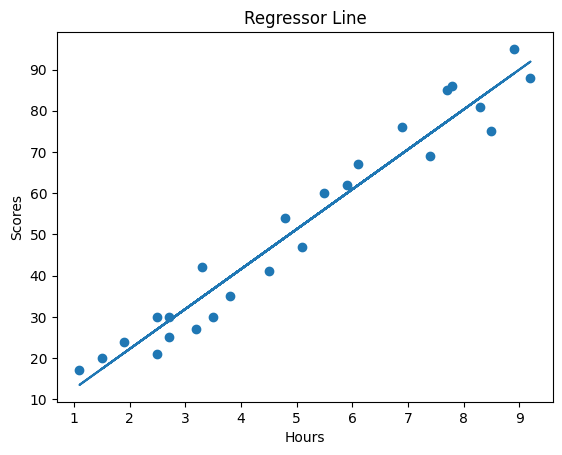

In [101]:
line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regressor Line')
plt.show()

Now we make the predictions using the model and the test data

In [102]:
y_pred = model.predict(X_test)
print('Predictions Complete')

Predictions Complete


We analyse the model using MSE or Mean Squared Error method and MAE Mean Absolute Error.

In [104]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mse)

Mean Squared Error :  18.943211722315272
Mean Absolute Error :  18.943211722315272


Now we compare the predicted Scores to the actual Scores from the Test data.

In [105]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


Let us make prediction for when a student studies for 9.25 hours each day by creatinga dataframe for our own data and predict using the regression model.

In [106]:
my_hours = pd.DataFrame({'Hours': [9.25]})
my_pred = model.predict(my_hours)
print("No of Hours = ", my_hours['Hours'].values[0])
print("Predicted Score = ", my_pred)

No of Hours =  9.25
Predicted Score =  [92.38611528]
